## Chest-X-Rays-Analysis

Identifying Pneumonia in Chest X-Rays by Image-Based Deep Learning

### Import packages

In [4]:
# Import data visualisation and manipulation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style
import seaborn as sns

# Import standard libraries
import os
import random

# File and directory access
from pathlib import Path 
import glob

# Configuration of plotting settings 
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Import dataset

Dataset source: https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images

In [2]:
# Path to the data directory
main_path = Path('../Chest-X-Rays-Analysis/data')

# Path to train directory
train_path = main_path / 'train'

# Path to test directory
test_path = main_path / 'test'

# Get the paths to the images in normal and pneumonia sub-directories
train_normal = list((train_path / 'NORMAL').glob('*.jpeg'))
train_pneumonia = list((train_path / "PNEUMONIA").glob('*.jpeg'))
test_normal = list((test_path / 'NORMAL').glob('*.jpeg'))
test_pneumonia = list((test_path / "PNEUMONIA").glob('*.jpeg'))

In [3]:
train_list = [x.name for x in train_normal]
train_list.extend([x.name for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , 
                                        ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x.name for x in test_normal]
test_list.extend([x.name for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [372]:
df_train

,class,image
0,Normal,NORMAL-1003233-0001.jpeg
1,Normal,NORMAL-1012843-0001.jpeg
2,Normal,NORMAL-1014768-0001.jpeg
3,Normal,NORMAL-1023731-0001.jpeg
4,Normal,NORMAL-1029510-0001.jpeg
...,...,...
5227,Pneumonia,VIRUS-9934736-0003.jpeg
5228,Pneumonia,VIRUS-9947411-0002.jpeg
5229,Pneumonia,VIRUS-9962961-0002.jpeg
5230,Pneumonia,VIRUS-9963654-0001.jpeg


In [361]:
df_test

,class,image
0,Normal,NORMAL-1049278-0001.jpeg
1,Normal,NORMAL-1110860-0001.jpeg
2,Normal,NORMAL-11419-0001.jpeg
3,Normal,NORMAL-115218-0001.jpeg
4,Normal,NORMAL-1160949-0001.jpeg
...,...,...
619,Pneumonia,VIRUS-9584831-0001.jpeg
620,Pneumonia,VIRUS-9671740-0001.jpeg
621,Pneumonia,VIRUS-9783315-0001.jpeg
622,Pneumonia,VIRUS-9890836-0001.jpeg


### Data exploration

Dataset consist of two classes: Normal and Pneumonia. 
There are 5232 images in train set and 624 images in test set.

Data distribution in train set:

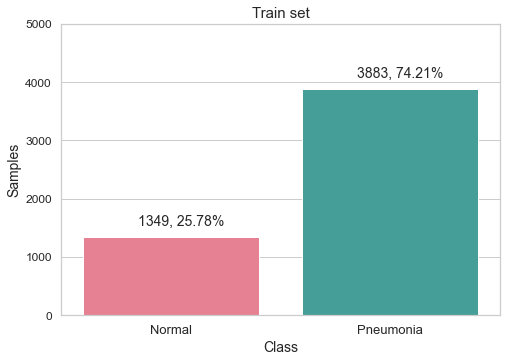

In [46]:
plt.figure(figsize=(7,5))

ax = sns.countplot(x='class', data=df_train, palette="husl")

plt.title("Train set", fontsize=15)
plt.xlabel("Class", fontsize= 14)
plt.ylabel("Samples", fontsize= 14)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 13)

for p in ax.patches:
    ax.annotate((str(p.get_height()) + ", " + str(p.get_height() / len(df_train) * 100)[0:5] + "%"), 
                (p.get_x() + 0.25, p.get_height() + 200), fontsize = 14)
    
plt.show()

Data distribution in test set:

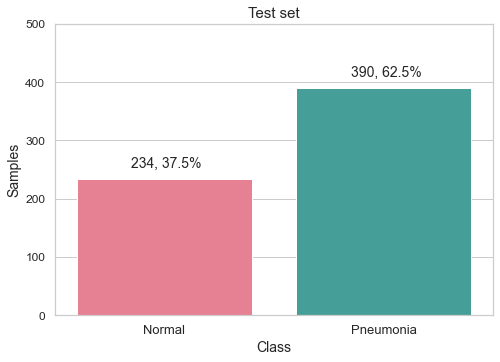

In [48]:
plt.figure(figsize=(7,5))

ax = sns.countplot(x='class', data=df_test, palette="husl")

plt.title("Test set", fontsize=15)
plt.xlabel("Class", fontsize= 14)
plt.ylabel("Samples", fontsize= 14)
plt.ylim(0,500)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 13)

for p in ax.patches:
    ax.annotate((str(p.get_height()) + ", " + str(p.get_height() / len(df_test) * 100)[0:5] + "%"), 
                (p.get_x() + 0.25, p.get_height() + 20), fontsize = 14)
    
plt.show()

Both sets seem to be imbalanced having more samples from "Pneumonia" class.